[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-01-apt-price-input)

# 전국 신규 민간 아파트 분양가격 동향

2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.


## 다루는 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 실습
* 공공데이터 다운로드 후 주피터 노트북으로 로드하기
* 판다스를 통해 데이터를 요약하고 분석하기
* 데이터 전처리와 병합하기
* 수치형 데이터와 범주형 데이터 다루기
* 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램(distplot) 실습하기

## 데이터셋
* 다운로드 위치 : https://www.data.go.kr/dataset/3035522/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2019년 12월)
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [1]:
%mv /Users/yeon/Downloads/주택도시보증공사_전국\ 평균\ 분양가격\(2019년\ 12월\).csv data

mv: /Users/yeon/Downloads/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv: No such file or directory


In [2]:
%mv /Users/yeon/Downloads/전국\ 평균\ 분양가격\(2013년\ 9월부터\ 2015년\ 8월까지\).csv data

mv: /Users/yeon/Downloads/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv: No such file or directory


In [3]:
%ls data

전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
주택도시보증공사_전국 평균 분양가격(2019년 12월).csv


In [4]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러옵니다.
import pandas as pd

## 데이터 로드
### 최근 파일 로드
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러옵니다.
이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않습니다.
보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있습니다.
df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드합니다.

* 한글인코딩 : [‘설믜를 설믜라 못 부르는’ 김설믜씨 “제 이름을 지켜주세요” : 사회일반 : 사회 : 뉴스 : 한겨레](http://www.hani.co.kr/arti/society/society_general/864914.html)

데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력합니다.

In [5]:
# 최근 분양가 파일을 로드해서 df_last 라는 변수에 담습니다.
# 파일로드시 OSError가 발생한다면, engine="python"을 추가해 보세요.
# 윈도우에서 파일탐색기의 경로를 복사해서 붙여넣기 했는데도 파일을 불러올 수 없다면
# 아마도 경로에 있는 ₩ 역슬래시 표시를 못 읽어왔을 가능성이 큽니다. 
# r"경로명" 으로 적어주세요.
# r"경로명"으로 적게 되면 경로를 문자 그대로(raw) 읽으라는 의미입니다.

df_last = pd.read_csv("data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding="euc-kr")
df_last.shape

(4335, 5)

In [6]:
# head 로 파일을 미리보기 합니다.
# 메소드 뒤에 ?를 하면 자기호출 이라는 기능을 통해 메소드의 docstring을 출력합니다.
# 메소드의 ()괄호 안에서 Shift + Tab키를 눌러도 같은 문서를 열어볼 수 있습니다.
# Shift + Tab + Tab 을 하게 되면 팝업창을 키울 수 있습니다.

df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [7]:
# tail 로도 미리보기를 합니다.

df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


### 2015년 부터 최근까지의 데이터 로드
전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일을 불러옵니다.
df_first 라는 변수에 담고 shape로 행과 열의 갯수를 출력합니다.

In [8]:
# 해당되는 폴더 혹은 경로의 파일 목록을 출력해 줍니다.

%ls data

전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
주택도시보증공사_전국 평균 분양가격(2019년 12월).csv


In [9]:
# df_first 에 담고 shape로 행과 열의 수를 출력해 봅니다.
df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv",
                       encoding="cp949")
df_first.shape

(17, 22)

In [10]:
# df_first 변수에 담긴 데이터프레임을 head로 미리보기 합니다.

df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [11]:
# df_first 변수에 담긴 데이터프레임을 tail로 미리보기 합니다.

df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


### 데이터 요약하기

In [12]:
# info 로 요약합니다.

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


### 결측치 보기

isnull 혹은 isna 를 통해 데이터가 비어있는지를 확인할 수 있습니다.
결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

In [13]:
# isnull 을 통해 결측치를 봅니다.
# True == 1
# False == 0

df_last.isnull()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


In [14]:
# isnull 을 통해 결측치를 구합니다.

df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [15]:
# isna 를 통해 결측치를 구합니다.

df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

In [16]:
type(pd.np.nan)

<ipython-input-16-e71c757bba12>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  type(pd.np.nan)


float

In [17]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["분양가격"].head(1)

0    5841.0
Name: 분양가격, dtype: float64

### 평당분양가격 구하기
공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [18]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


### 분양가격 요약하기

In [19]:
# info를 통해 분양가격을 봅니다.

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [20]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼을 요약합니다.

df_last["분양가격(㎡)"].describe()

# freq : 가장 빈번하게 등장하는 문자(object)가 몇 번 등장하는지

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [21]:
# 수치데이터로 변경된 분양가격 컬럼을 요약합니다.

df_last["분양가격"].describe() # 수치데이터

# 요약된 결과값이 다르다.
# 데이터의 타입만 변경했는데 count값이 다른 이유 :
# "분양가격(㎡)"에는 공백 데이터가 있었음 -> 결측치가 아니라 데이터가 있는 것으로 간주
# "분양가격"에서 공백 데이터는 -> 모두 결측치로 변경

# mean과 50%(중앙값)이 얼마나 차이나는지 주위깊게 볼 것
# -> mean이 훨씬 크다. : max값이 아주 크므로 이런 결과

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

### 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

* pandas 의 string-handling 기능을 좀 더 보고 싶다면 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [22]:
# 규모구분의 unique 값 보기

df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [23]:
# 규모구분을 전용면적으로 변경하기

df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")

# replace : text가 완전히 일치해야만 바뀐다. (일부만 변경 x)
# -> string method를 사용하기
# 반복되는 '전용면적'이라는 text를 제거하면 메모리 사용량이 줄어들 것

df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "").str.strip()
df_last["전용면적"]

# str.strip() : 앞뒤의 공백 제거해줌

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

### 필요없는 컬럼 제거하기
drop을 통해 전처리 해준 컬럼을 제거합니다. pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 때가 있는데 행과 열중 어떤 기준으로 처리를 할 것인지를 의미합니다. 보통 기본적으로 0으로 되어 있고 행을 기준으로 처리함을 의미합니다. 메모리 사용량이 줄어들었는지 확인합니다.

In [24]:
# info로 정보 보기

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [25]:
# drop 사용시 axis에 유의 합니다.
# axis 0:행, 1:열

df_last = df_last.drop(["규모구분", "분양가격(㎡)"], axis=1)

# axis : 기본값 0=행 / 1=열

In [26]:
# 제거가 잘 되었는지 확인 합니다.

df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [27]:
# 컬럼 제거를 통해 메모리 사용량이 줄어들었는지 확인합니다.

df_last.info()

# memory usage가 271에서 203으로 줄었다.
# 사용하지 않는 column 삭제하면 메모리 사용량 줄일 수 있다!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


## groupby 로 데이터 집계하기
groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.

In [28]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()

df_last.groupby(["지역명"])["평당분양가격"].mean()

# .describe()하면 전체적으로 관측 가능

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [29]:
# 전용면적으로 분양가격의 평균을 구합니다.

df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [30]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.

df_last.groupby(["지역명", "전용면적"])["평당분양가격"].mean().unstack().round()

# .unstack() : 끝에 있는 인덱스가 컬럼값으로 오게 됨
# .round() : 소수점 제거

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


In [31]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.

g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
g
# g.unstack().transpose()

# T : transpose

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

## pivot table 로 데이터 집계하기
* groupby 로 했던 작업을 pivot_table로 똑같이 해봅니다.

In [32]:
# 지역명을 index 로 평당분양가격 을 values 로 구합니다.

pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"], aggfunc="mean")

# aggfunc는 자동으로 평균값 출력으로 지정됨

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [33]:
df_last.groupby(["전용면적"])["평당분양가격"].mean()

# series 형태로 가져오게 되면 data frame 형태로 보이지 않으므로 조금 더 빠르게 가져올 수는 있음

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [34]:
# 전용면적을 index 로 평당분양가격 을 values 로 구합니다.

pd.pivot_table(df_last, index="전용면적", values="평당분양가격")

# pivot vs. pivot_table : 연산(aggregation table)이 없느냐 있느냐
# 여기도 기본이 mean

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [35]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
# df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

df_last.pivot_table(index="전용면적", columns="지역명", values="평당분양가격").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [36]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
# g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()

p = pd.pivot_table(df_last, index=["연도", "지역명"], values="평당분양가격")
p.loc[2018]

# .loc[] : 행을 기준으로 가져올 때 사용
# 데이터가 짤렸을 때 2018년 데이터만 보고싶은 경우

# group by보단 pivot_table이 조금 더 직관적으로 사용 가능
# (장점) group by는 결과값이 series 형태이므로 pivot_table보다 연산의 결과가 더 빠르다.

,평당분양가격
지역명,
강원,8219.255000
경기,14258.420000
경남,9327.670000
경북,8680.776923
광주,9526.953333
대구,12139.252632
대전,10234.106667
부산,12889.965000
서울,23202.245000


## 최근 데이터 시각화 하기
### 데이터시각화를 위한 폰트설정
한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러옵니다.

In [37]:
import matplotlib.pyplot as plt

# plt.rc("font", family="Malgun Gothic")
plt.rc("font", family="AppleGothic")

### Pandas로 시각화 하기 - 선그래프와 막대그래프
pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있습니다.
seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠릅니다.

In [38]:
# 지역명으로 분양가격의 평균을 구하고 선그래프로 시각화 합니다.

g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g.plot

# 시각화를 위해 plot() 사용
# .sort_values() : 정렬해서 표현
# ascending=False : 내림차순 정렬
# g.plot.bar() & g.plot(kind="bar") : 막대그래프로
# rot=0 : 글씨 똑바로
# figsize=(10, 3) : (글씨 넓게) 그래프 넓게

<AxesSubplot:xlabel='지역명'>

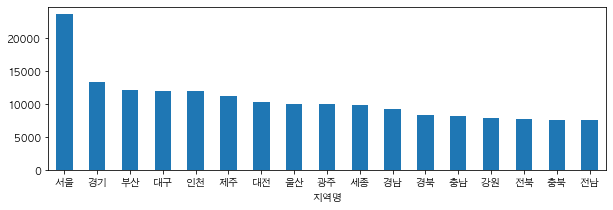

In [39]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.

g.plot.bar(rot=0, figsize=(10, 3))

전용면적별 분양가격의 평균값을 구하고 그래프로 그려봅니다.

<AxesSubplot:xlabel='전용면적'>

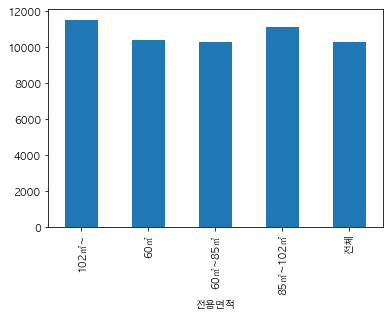

In [40]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.

df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar()

<AxesSubplot:xlabel='연도'>

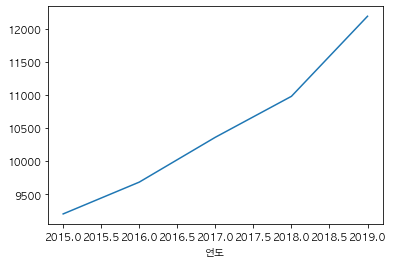

In [41]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.

df_last.groupby(["연도"])["평당분양가격"].mean().plot()

### box-and-whisker plot | diagram

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 : 
    * [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    * [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

<AxesSubplot:>

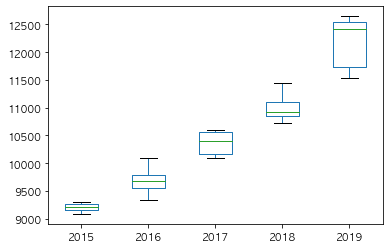

In [42]:
# index를 월, columns 를 연도로 구하고 평당분양가격 으로 pivot_table 을 구하고 상자수염그림을 그립니다.

df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box()

# index 값 별로 나눠짐

# box plot은 bar plot에 비해 값을 더 자세히 표현할 수 있다.
# 이상치를 볼 수도 있다.
# 중앙값, 최소값, 최대값 등 5가지 볼 수 있다.

<AxesSubplot:>

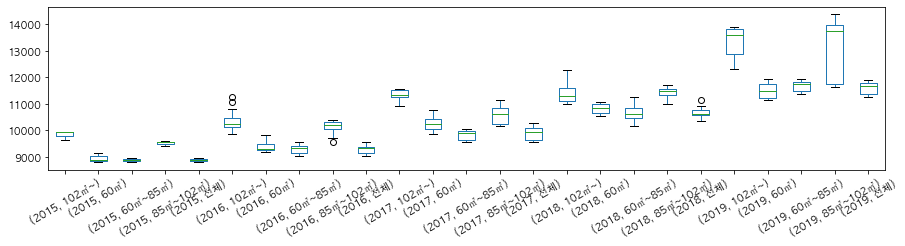

In [43]:
# columns 에 "연도", "전용면적"을 추가해서 pivot_table 을 만들고 시각화 합니다.

p = df_last.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격")
p.plot.box(figsize=(15, 3), rot=30)


<AxesSubplot:xlabel='연도'>

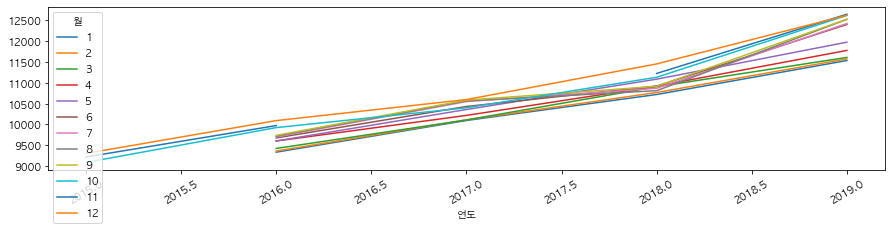

In [44]:
# index를 월, columns 를 지역명으로 구하고 평당분양가격 으로 pivot_table 을 구하고 선그래프를 그립니다.

p = df_last.pivot_table(index="연도", columns="월", values="평당분양가격")

p.plot(figsize=(15, 3), rot=30)

# 기본이 line plot
# 일부 그래프에는 월 데이터가 누락이 되었구나
# 15-19년동안 분양가가 꾸준히 상승했다.


### Seaborn 으로 시각화 해보기

In [45]:
# pandas에는 plot 기능 사용하면 바로 시각화 가능했었음
# 라이브러리 로드하기

import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

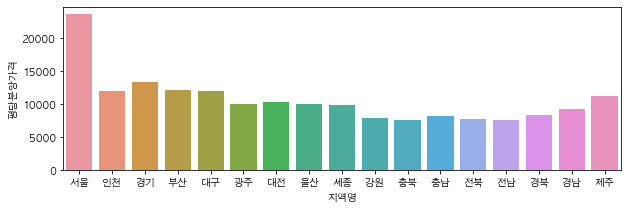

In [46]:
# barplot으로 지역별 평당분양가격을 그려봅니다.

plt.figure(figsize=(10, 3))
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci=None)

# pandas로 시각화 - 직접 연산을 해 barplot을 그림
# seaborn은 통계적인 연산을 바로 해줌 (연산을 하지 않음) (큰 장점)
# 고급 통계 기술을 일일이 다 계산해주지 않더라도 내부에서 알아서 계산 해준다.

# 위에서 groupby, pivot_table로 연산을 하는 걸 barplot 내부에서 연산 할 수 있음
# confidence interval (ci)
# ci=95 (기본값) - 신뢰구간 95% 비율로 샘플링 했을 때의 값이 포함된다. (95%로 추정한 값)
# 나머지 5%는 이상치라고 볼 수 있음
# ci="sd" : 실제 관측 값 (observation value)의 standard variance(표준편차)를 그려주게 됨
# ci=None : 그리고싶지 않다
# ci옵션은 estimate(추정)해서 그리기 때문에 좀 더 오래 걸릴 수 있음

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

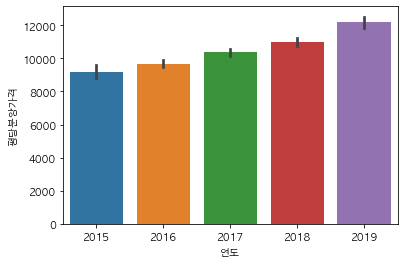

In [47]:
# barplot으로 연도별 평당분양가격을 그려봅니다.

sns.barplot(data=df_last, x="연도", y="평당분양가격")

# 전체 데이터는 2013년부터 있지만 아직 df_first와 합쳐주지 않아 2015년부터의 데이터만 나옴
# 평균 가격이 꾸준히 상승했다.

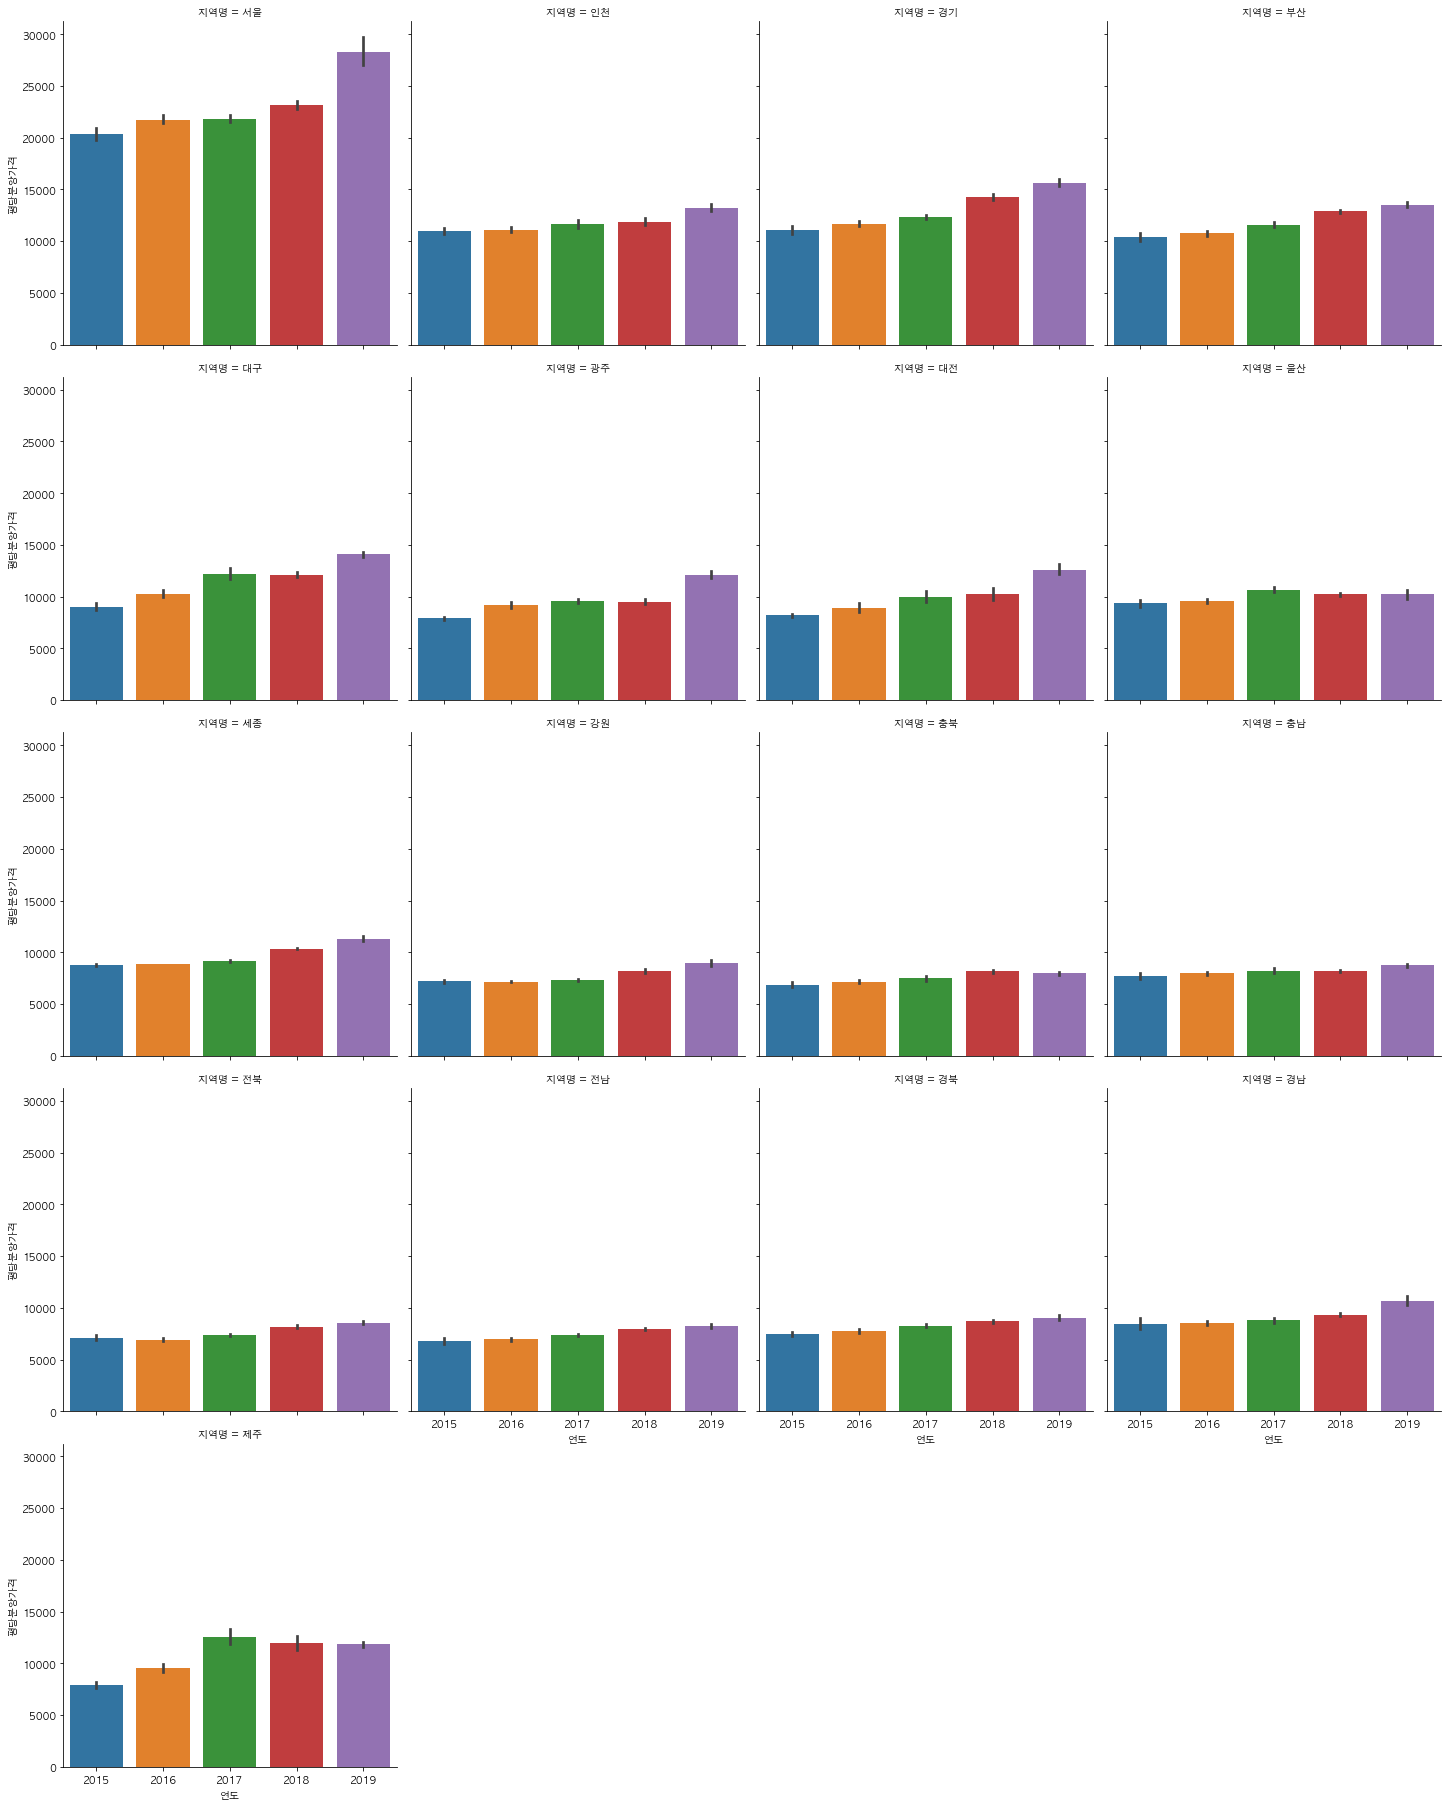

In [48]:
# catplot 으로 서브플롯 그리기

sns.catplot(data=df_last, x="연도", y="평당분양가격", 
            kind="bar", col="지역명", col_wrap=4)

# barplot도 catplot 이용하면 subplot으로 그릴 수 있음
# 연도별 평당분양가격을 지역명으로 subplot으로 그릴 수 있게 된다.

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

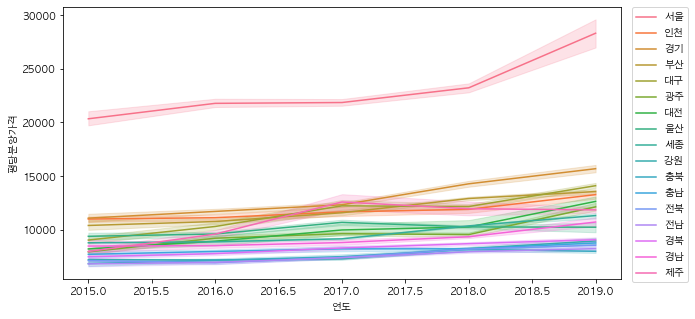

In [49]:
# lineplot으로 연도별 평당분양가격을 그려봅니다.
# hue 옵션을 통해 지역별로 다르게 표시해 봅니다.

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) # 레전드 밖에 그리기 (위 링크 참조)

# anchor : 그래프에서 얼마나 떨어지게 될 건지

# 사용법이 거의 다 비슷하다.
# hue : 색상을 의미 (보통 카테고리 형태의 범주형 값을 넣어줌)
# hue="지역명" : 지역별로 평당 분양 가격 그리기

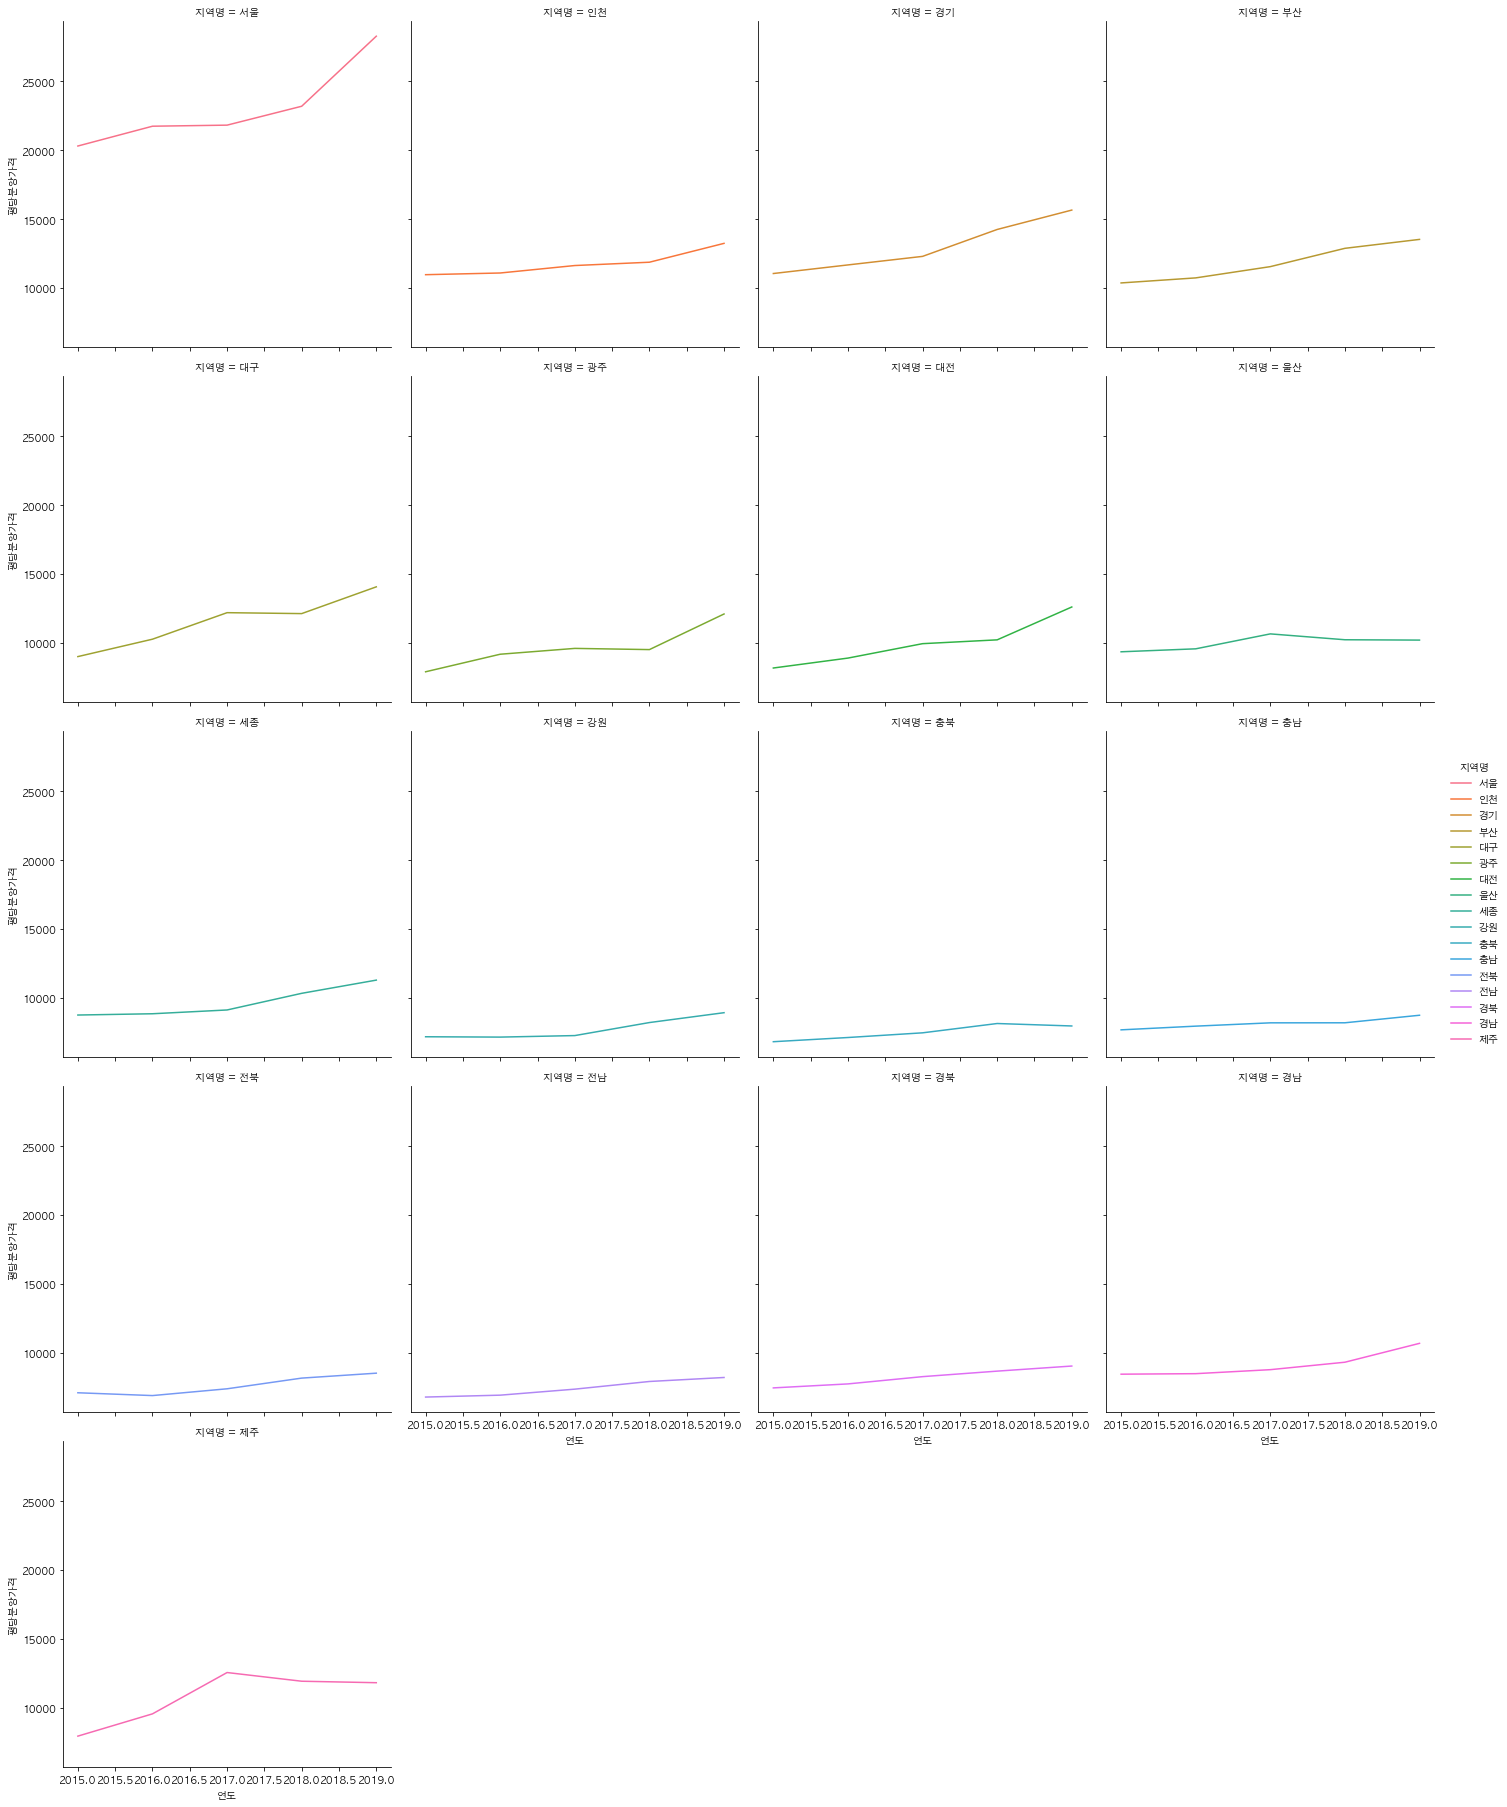

In [50]:
# relplot 으로 서브플롯 그리기

sns.relplot(data=df_last, x="연도", y="평당분양가격",
            hue="지역명", kind="line", col="지역명", col_wrap=4, ci=None)

# 기본적으로 scatter plot을 그리게 됨
# kind로 모양 지정하기
# col_wrap : 한 줄에 몇 개씩 subplot을 그릴 것인지

# relplot : lineplot을 subplot으로 그린 것

### boxplot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

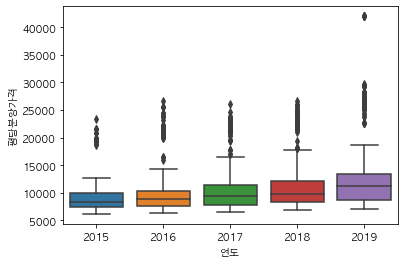

In [51]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.
# 최솟값
# 제 1사분위수
# 제 2사분위수( ), 즉 중앙값
# 제 3 사분위 수( )
# 최댓값

sns.boxplot(data=df_last, x="연도", y="평당분양가격")

# 사용법이 위와 거의 똑같다.
# hue 값은 카테고리 값이 적을 때 사용해야 좋다.
# 점으로 보이는 값들은 이상치

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

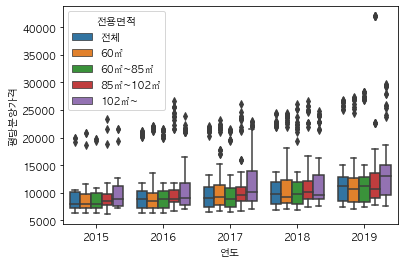

In [52]:
# hue옵션을 주어 전용면적별로 다르게 표시해 봅니다.

# plt.figure(figsize(12, 3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")



<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

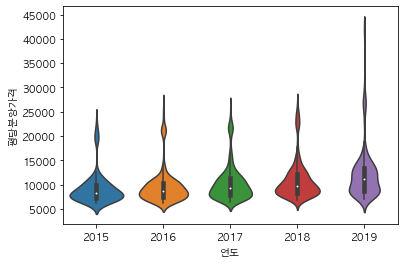

In [53]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.

sns.violinplot(data=df_last, x="연도", y="평당분양가격")

# boxplot의 단점(네모 크기에 따라 1-3사분위에 값 어느정도 포함되어있는지 파악하기 쉬운 편) 보완
# barplot : 평균값에 대한 높이만 표현 -> 데이터가 어느정도 들어가있는지 확인 어려움
# -> boxplot으로 표현하면 데이터가 많고 적은지도 파악 가능 / 이상치 여부도 확인 가능
# but, box 안에 값이 어떻게 분포되어있는지 알기 어려움 -> violinplot이용

# 밀도 추정 그래프도 그릴 수 있음 (밀도 추정 그래프를 세로로 세운 것인 violinplot)
# raw data가 변하면 box-plot은 반영x, vioilin-plot은 반영 o

### lmplot과 swarmplot 

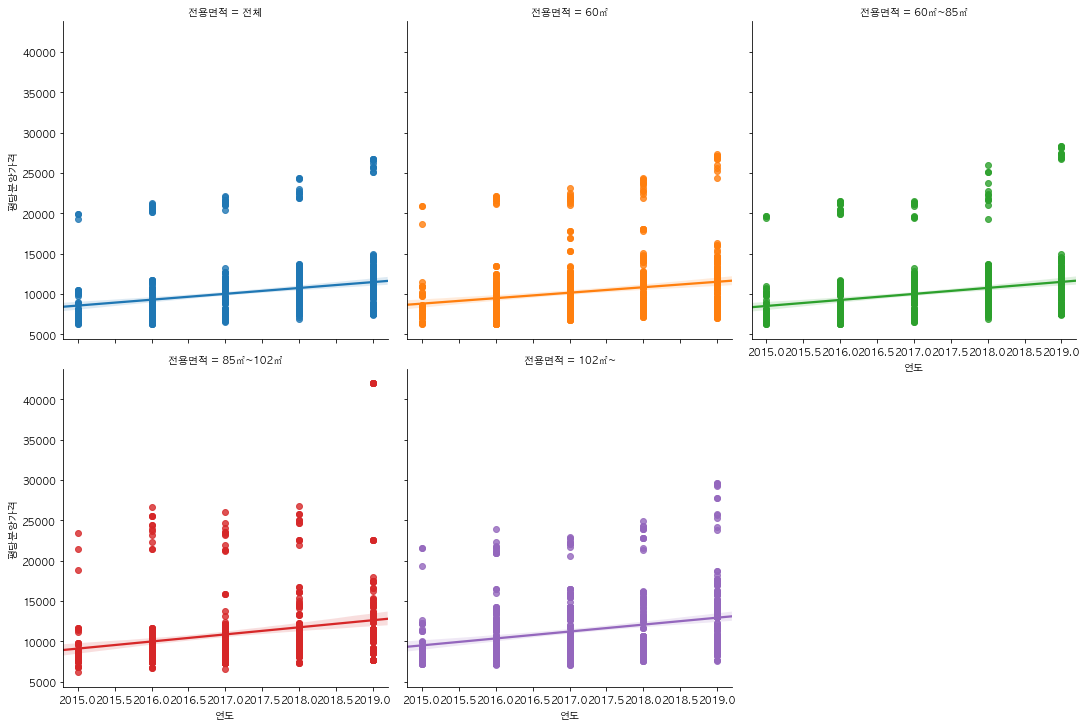

In [54]:
# 연도별 평당분양가격을 lmplot으로 그려봅니다. 
# hue 옵션으로 전용면적을 표현해 봅니다.

# sns.scatterplot(data=df_last, x="연도", y="평당분양가격")
# sns.regplot(data=df_last, x="연도", y="평당분양가격", truncate=False)
sns.lmplot(data=df_last, x="연도", y="평당분양가격", truncate=False, hue="전용면적", col="전용면적", col_wrap=3)


# scatterplot은 x축과 y축이 수치형일 때 주로 그려줌 (분포 표현)

# regplot은 scatterplot에 회귀선을 그려주는 plot -> 데이터의 상관관계 파악 가능
# regplot에는 hue 옵션이 없음 -> lmplot을 사용하자 (색깔별로 표시 가능)

# lmplot을 그리면 색깔이 겹쳐져 알기 어려운 경우 있음 -> col 값을 주어 subplot 그려보자
# lmplot은 데이터가 겹쳐져 어느 정도로 데이터 분포가 되어있는지 알기 어려움
# lmplot은 x, y축 모두 수치 데이터일 때 그리기 적합
# 수치보다는 카테고리 형태일 때는 swarmplot이 적합

# 1. seaborn의 최신버전에서 lmplot의 truncate 기본값이  True 로 변경이 되었어요. truncate=False 로 설정해 주시면 잘리는 문제를 해결하실 수 있을거에요.


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

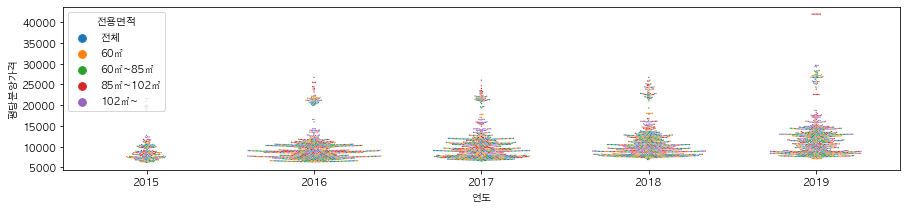

In [55]:
# 연도별 평당분양가격을 swarmplot 으로 그려봅니다. 
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합합니다.

plt.figure(figsize=(15, 3))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", size=1.3, hue="전용면적")

# 연도별로 평당분양가격 그리는데, lmplot의 단점 보완해 점을 하나하나씩 옆으로 번지게 찍어줌
# 나는 실행이 안 되어서 size=1로 변경 -> 동그라미 크기 줄이기
# 시간이 굉장히 오래 걸림 -> 너무 많은 데이터를 swarmplot으로 그리려는 것은 적합하지 x

### 이상치 보기

In [56]:
# 평당분양가격의 최대값을 구해서 max_price 라는 변수에 담습니다.

df_last["평당분양가격"].describe()

# describe : 수치형 데이터에 대한 요약 볼 수 있음
# 평균&최대값 차이 많음 .. 3사분위&최대값 차이 많음.. 중앙값 <평균
# 이상치의 평균값이 많이 영향 받았겠구나!

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [57]:
max_price = df_last["평당분양가격"].max()
max_price

# 어떤 데이터에 최대값 존재하는지 궁금하다

42002.399999999994

In [58]:
# 서울의 평당분양가격이 특히 높은 데이터가 있습니다. 해당 데이터를 가져옵니다.

df_last[df_last["평당분양가격"] == max_price]

# 데이터를 통해 이상치가 있는지, 경향성이 있는지, 가설을 세우고 그 가설이 맞는지를 검증해볼 때 시각화를 통해 확인 가능합니다.
# pandas에서는 groupby, pivot_table로 따로 연산을 해줬어야 하지만
# seaborn에서는 따로 연산을 할 필요 없이 알아서 (회귀선까지도, 이상치값도) 표현해줌
# 특정 값이 어느정도 이상인지 ... 등도 시각화 가능하다

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


### 수치데이터 히스토그램 그리기

distplot은 결측치가 있으면 그래프를 그릴 때 오류가 납니다. 
따라서 결측치가 아닌 데이터만 따로 모아서 평당분양가격을 시각화하기 위한 데이터를 만듭니다.
데이터프레임의 .loc를 활용하여 결측치가 없는 데이터에서 평당분양가격만 가져옵니다.

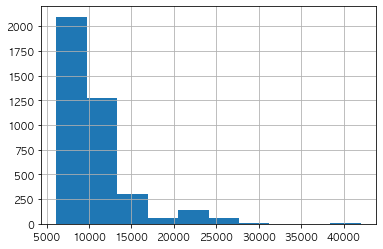

In [59]:
h = df_last["평당분양가격"].hist(bins=10)
# h = df_last.hist(bins=10) # 전체적으로 그릴 수도 있음



# histogram은 막대를 통해 빈도수를 표현해줌
# bins : 통에 몇 개의 통을 만들어 데이터 담아 줄 것인지
# 기본 bins=10 : 막대 10개의 구간에 데이터 나눠 담고 빈도수가 몇 개인지 셀 수 있음

In [60]:
# 결측치가 없는 데이터에서 평당분양가격만 가져옵니다. 그리고 price라는 변수에 담습니다.
# .loc[행]
# .loc[행, 열]

# df_last[df_last["평당분양가격"].notnull()]
price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]
price

# .loc[행] : notnull인 데이터값들 중 '평당분양가격'만 가지고 옴

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
4327    10114.5
4328    10715.1
4330    12810.6
4332    12863.4
4334    11883.3
Name: 평당분양가격, Length: 3957, dtype: float64

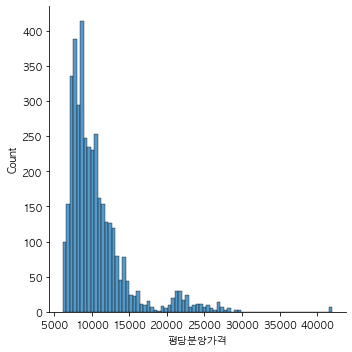

In [61]:
# distplot으로 평당분양가격을 표현해 봅니다.

sns.displot(price)

# distplot에는 x, y가 없다.
# 최근 seaborn이 업데이트 되어 distplot 대신 displot을 이용하자
# bins : 막대를 몇 개로 해서 그릴 것인지
# 정규분포 -> 아래의 부드러운 곡선으로 그린 넓이의 합(밀도)이 1이 되게 함

/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

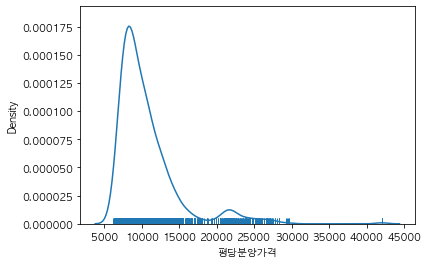

In [62]:
# sns.distplot(price, hist=False, rug=True)

sns.distplot(price, hist=False, rug=True)

# distplot에서 추정곡선을 빼고 히스토그램만 그리기


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

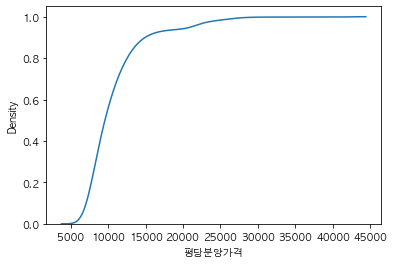

In [63]:
sns.kdeplot(price, cumulative=True)

# 누적 그래프 (여기서는 평당분양가격이므로 누적 그래프가 의미 없긴 함)

* distplot을 산마루 형태의 ridge plot으로 그리기
* https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples
* https://seaborn.pydata.org/examples/kde_ridgeplot.html

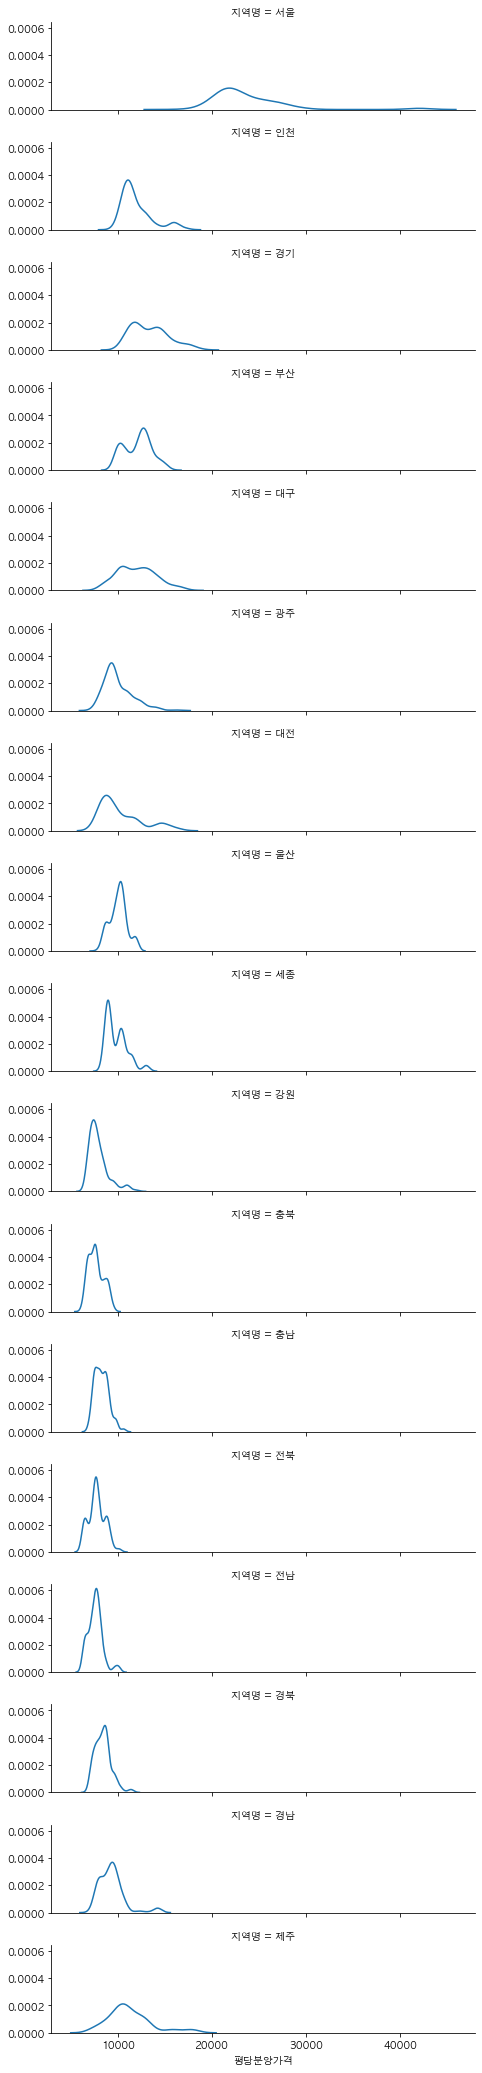

In [64]:
# subplot 으로 표현해 봅니다.

g = sns.FacetGrid(df_last, row="지역명",
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "평당분양가격");

# 분포가 어떻게 되어있는지 알 수 있다.
# 서울은 가운데 분포, 끝에 이상치 있음
# 서울에 비해 낮은 분양가에 분포 되어있음

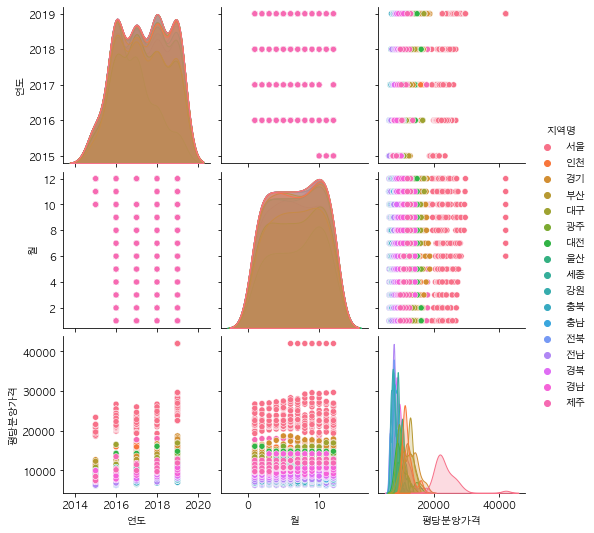

In [65]:
# pairplot

df_last_notnull = df_last.loc[df_last["평당분양가격"].notnull(), 
                             ["연도", "월", "평당분양가격", "지역명", "전용면적"]]
sns.pairplot(df_last_notnull, hue="지역명")

# 평당분양가격의 가장 오른쪽에 있는 값들이 서울의 값들일 것

In [66]:
# 규모구분(전용면적)별로 value_counts를 사용해서 데이터를 집계해 봅니다.

df_last["전용면적"].value_counts()

85㎡~102㎡    867
102㎡~       867
전체          867
60㎡~85㎡     867
60㎡         867
Name: 전용면적, dtype: int64

## 2015년 8월 이전 데이터 보기

In [67]:
pd.options.display.max_columns = 25

In [68]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [69]:
# 모든 컬럼이 출력되게 설정합니다.

df_first

# 중간에 끊기는 데이터 ... 다 보고싶다면 : 윗 라인대로

# df_last & df_first 다른 형태라 둘이 합칠 수 없을 것 같다 -> 똑같은 형태로 만들어주자

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,8627,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [70]:
# head 로 미리보기를 합니다.

df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [71]:
# df_first 변수에 담겨있는 데이터프레임의 정보를 info를 통해 봅니다.

df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [72]:
# 결측치가 있는지 봅니다.

df_first.isnull().sum()

# True, False 다 더하기 (나온 숫자가 결측치의 수)

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### melt로 Tidy data 만들기
pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있습니다. 
df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다릅니다. 
같은 형태로 만들어주어야 데이터를 합칠 수 있습니다. 
데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여봅니다.

* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
* [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf)

In [73]:
# head 로 미리보기 합니다.

df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [74]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담습니다. 


df_first_melt = df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df_first_melt.head()

# variable : var_name
# value : value_name

# 컬럼에 데이터 들어가게 되면(df_first) 데이터 전처리가 쉽지 않다.
# 사용하기 쉽게 df_melt를 통해 녹여줬다.

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [75]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 
# ["지역명", "기간", "평당분양가격"] 으로 변경합니다.

df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


### 연도와 월을 분리하기
* pandas 의 string-handling 사용하기 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [76]:
date = "2013년12월"
date

'2013년12월'

In [77]:
# split 을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.

date.split('년')

['2013', '12월']

In [78]:
# 리스트의 인덱싱을 사용해서 연도만 가져옵니다.

date.split('년')[0]

'2013'

In [79]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.

date.split('년')[-1].replace("월", "")

# date.split('년')[1]

'12'

In [80]:
# parse_year라는 함수를 만듭니다.
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

def parse_year(date):
    year = date.split("년")[0]
    year = int(year)
    return year

y = parse_year(date)
print(type(y))
y

<class 'int'>


2013

In [81]:
# 제대로 분리가 되었는지 parse_year 함수를 확인합니다.

parse_year(date)

2013

In [82]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

def parse_month(date):
    month = date.split("년")[-1].replace("월", "")
    month = int(month)
    return month

In [83]:
# 제대로 분리가 되었는지 parse_month 함수를 확인합니다.

parse_month(date)

12

In [84]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담습니다.

df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt.head(1)

# '연도'라는 column 새로 생성됨

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [85]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 월만 추출해서 새로운 컬럼에 담습니다.

df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head(1)

# '월'이라는 column 생성

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [86]:
# 컬럼명을 리스트로 만들때 버전에 따라 tolist() 로 동작하기도 합니다.
# to_list() 가 동작하지 않는다면 tolist() 로 해보세요.

df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [87]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 합니다.
# sample을 활용해서 데이터를 미리보기 합니다.

df_last.sample()

# df_last.head(1)과 같은듯?
# 두 개의 데이터 합칠 준비 완료!

,지역명,연도,월,분양가격,평당분양가격,전용면적
3076,부산,2018,10,3846.0,12691.8,60㎡


In [88]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [89]:
# 최근 데이터가 담긴 df_last 에는 전용면적이 있습니다. 
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하도록 합니다.
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 변수에 담습니다.

df_last_prepare = df_last.loc[
    df_last["전용면적"] == "전체", cols].copy()
df_last_prepare.head(1)

# Boolean Indexing

# copy : df_last 값에 영향 주지 x

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [90]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 변수에 담습니다.

df_first_prepare = df_first_melt[cols].copy()
df_first_prepare.head(1)

# 필요한 column만

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189


### concat 으로 데이터 합치기
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [91]:
# df_first_prepare 와 df_last_prepare 를 합쳐줍니다.

df = pd.concat([df_first_prepare, df_last_prepare])
df.shape

(1224, 4)

In [92]:
# 제대로 합쳐졌는지 미리보기를 합니다.

df.head()
# df.tail()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0


In [153]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어봅니다.

df["연도"].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

### pivot_table 사용하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-and-pivot-tables

In [97]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그려봅니다.

t = pd.pivot_table(df, index="연도", columns="지역명", values="평당분양가격").round()
t

# 어떤게 높고 낮은지 한눈에 들어오지 않는다.

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

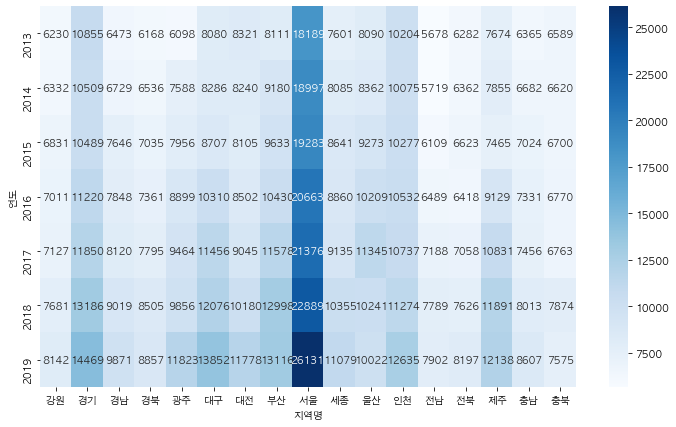

In [106]:
# 위에서 그린 피봇테이블을 히트맵으로 표현해 봅니다.

# sns.heatmap(t)
# sns.heatmap(t, cmap="Blues")

plt.figure(figsize=(12, 7))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")


# 테이블 자체를 바로 heatmap으로!
# (서울: 가격 제일 높다.)
# cmap : 한 가지 색상으로 보겠다.
# annot=True : 값까지 같이
# fmt(format)=".0f" : float 형태로 표현하는데 소수점없이 표현해라

In [107]:
# transpose 를 사용하면 행과 열을 바꿔줄 수 있습니다.

t.T

# T = transpose()
# t라는 data frame의 행과 열을 바꿔줌

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

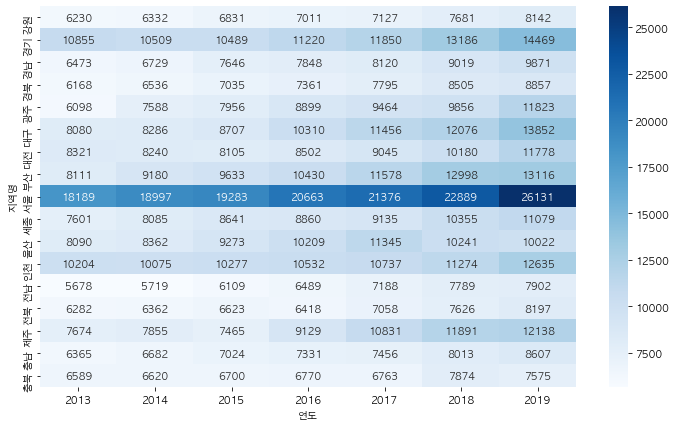

In [109]:
# 바뀐 행과 열을 히트맵으로 표현해 봅니다.

plt.figure(figsize=(12, 7))
sns.heatmap(t.T, cmap="Blues", annot=True, fmt=".0f")

# 서울 - 최근에 가격이 많이 올랐다.

In [181]:
# Groupby로 그려봅니다. 인덱스에 ["연도", "지역명"] 을 넣고 그려봅니다.

# df.groupby(["연도", "지역명"])["평당분양가격"].mean()
g = df.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

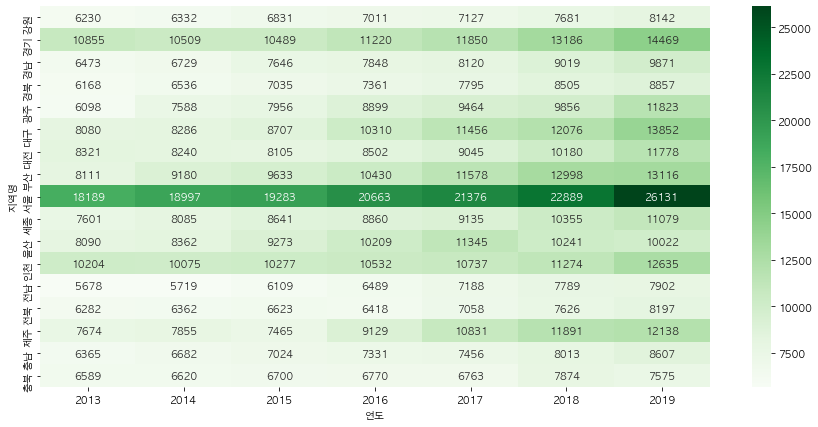

In [124]:
plt.figure(figsize=(15, 7))
sns.heatmap(g.T, annot=True, fmt=".0f", cmap="Greens")

## 2013년부터 최근 데이터까지 시각화하기
### 연도별 평당분양가격 보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

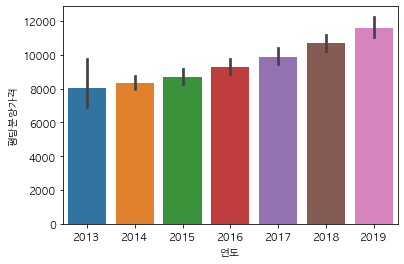

In [126]:
# barplot 으로 연도별 평당분양가격 그리기

sns.barplot(data=df, x="연도", y="평당분양가격")

# 합친 data는 df에 있음
# y축은 평균값 (95% 신뢰 구간)

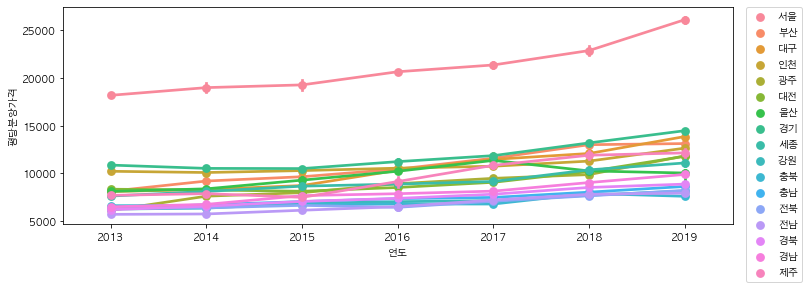

In [130]:
# pointplot 으로 연도별 평당분양가격 그리기

# sns.pointplot(data=df, x="연도", y="평당분양가격")
plt.figure(figsize=(12, 4))
sns.pointplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) # 레전드 밖에 그리기 (위 링크 참조)


# 기울기에 따라 값의 변화 정도 파악하기 쉬울 것
# hue 사용하면 그리는데 시간 좀 오래 걸림
# 위에서 한 legend 바깥에


(72, 4)


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

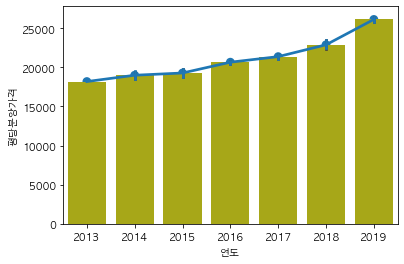

In [147]:
# 서울만 barplot 으로 그리기

df_seoul = df[df["지역명"] == "서울"].copy()
print(df_seoul.shape)

sns.barplot(data=df_seoul, x="연도", y="평당분양가격", color="y")
sns.pointplot(data=df_seoul, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

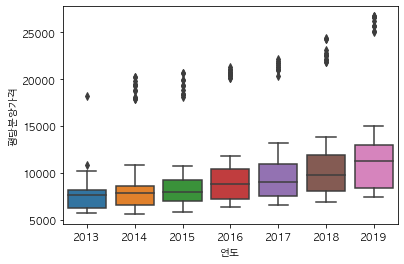

In [148]:
# 연도별 평당분양가격 boxplot 그리기

sns.boxplot(data=df, x="연도", y="평당분양가격")


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

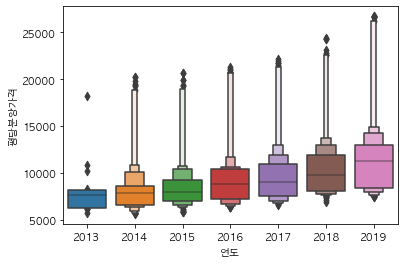

In [150]:
sns.boxenplot(data=df, x="연도", y="평당분양가격")

# boxenplot : boxplot 좀 더 개선해서 boxplot과 violinplot의 중간

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

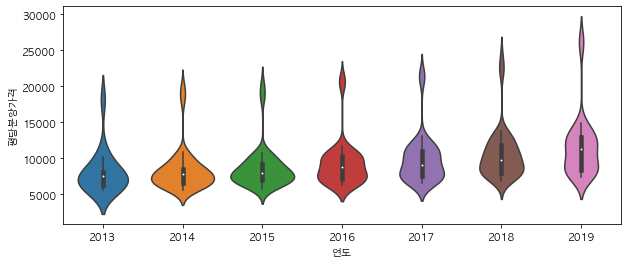

In [153]:
# 연도별 평당분양가격 violinplot 그리기

plt.figure(figsize=(10, 4))
sns.violinplot(data=df, x="연도", y="평당분양가격")

# 안의 네모 : boxplot
# 하얀색 점 : 중앙값

/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seabor

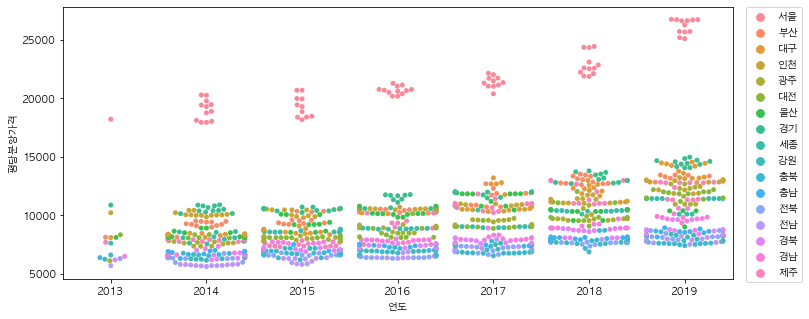

In [164]:
# 연도별 평당분양가격 swarmplot 그리기

# sns.lmplot(data=df, x="연도", y="평당분양가격")
# lmplot : scatterplot + 회귀선 (but, 선이 겹쳐보여 값의 분포 파악 어려움)

plt.figure(figsize=(12, 5))
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) # 레전드 밖에 그리기 (위 링크 참조)


# Warning이 뜨면 size=1 추가
# data 분포 확인 더 잘 됨


/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seabor

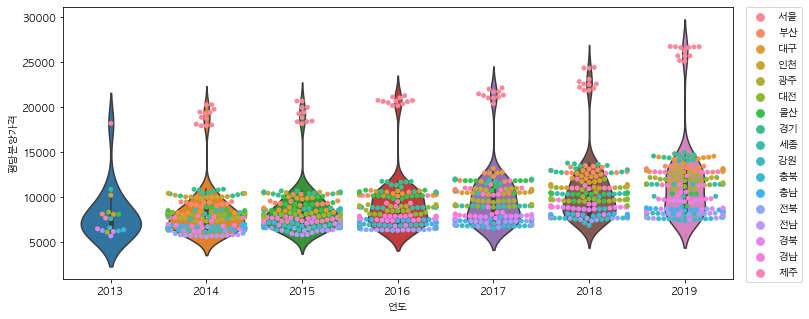

In [166]:
plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x="연도", y="평당분양가격")
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# vioinplot & swarmplot 겹쳐서 그리기


# 맨 위의 이상치는 다 서울의 값들이었다. !!

### 지역별 평당분양가격 보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

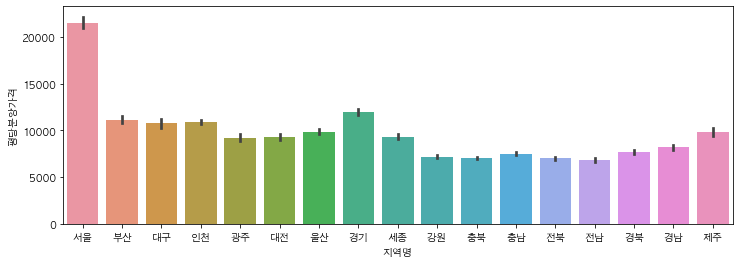

In [170]:
# barplot 으로 지역별 평당분양가격을 그려봅니다.

plt.figure(figsize=(12, 4))
sns.barplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

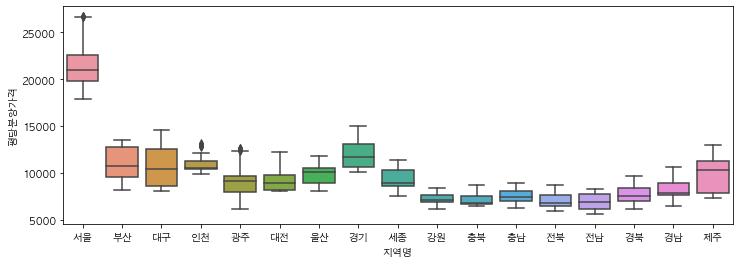

In [171]:
# boxplot 으로 지역별 평당분양가격을 그려봅니다.

plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")

# seaborn의 장점 : 그래프 시각화 할 때 우리가 따로 계산해주지 않더라도 그래프 쉽게 그릴 수 있음

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

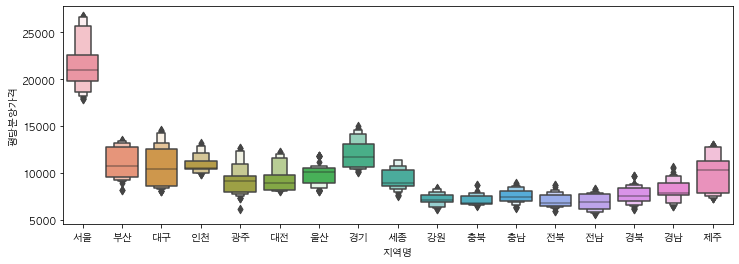

In [172]:
plt.figure(figsize=(12, 4))
sns.boxenplot(data=df, x="지역명", y="평당분양가격")

# boxplot 단점 보완해 box 안에 얼마나 data 분포되어있는지 distribution 값을 표현

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

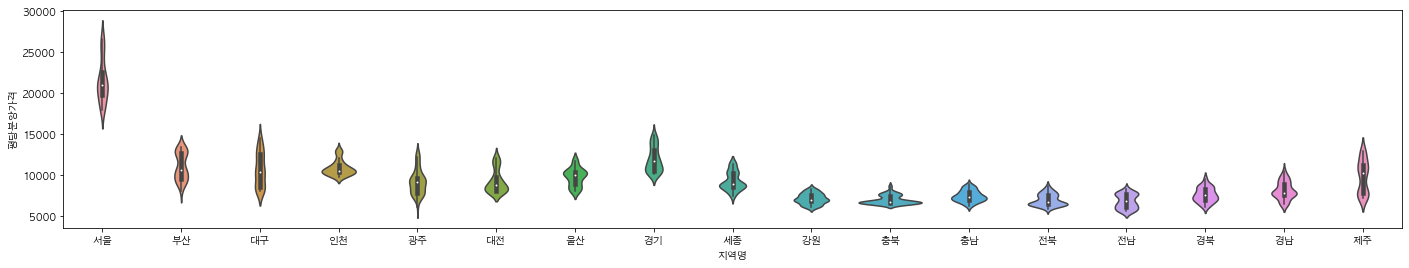

In [178]:
# violinplot 으로 지역별 평당분양가격을 그려봅니다.

plt.figure(figsize=(24, 4))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/seabor

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

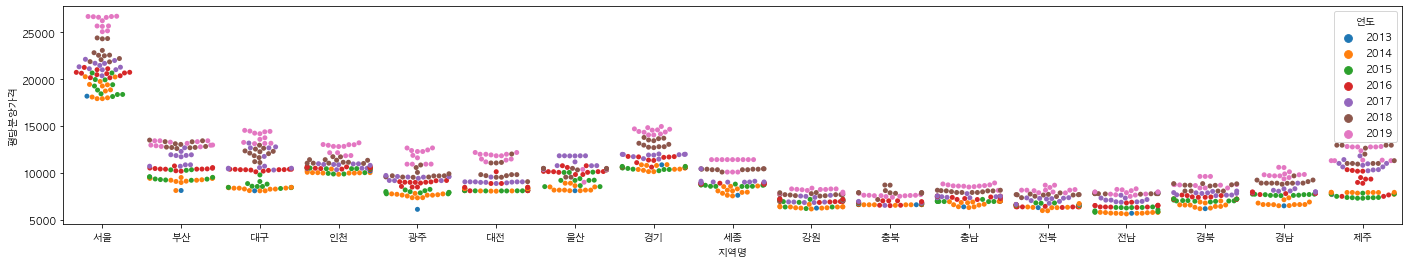

In [179]:
# swarmplot 으로 지역별 평당분양가격을 그려봅니다.

plt.figure(figsize=(24, 4))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", hue="연도")

In [ ]:
# 우리는 전혀 다른 두 개의 dataset을 가지고 분석을 해 봄
# tidy data 형태로 만들어주면 pandas에서 제공하는 concat기능을 활용해 붙일 수 있음
# groupby, pivot_table을 활용해 연산도 함 (한 눈에 보기 어려움 -> heatmap으로 확인 가능)
# 등등 subplot... 도 그림

<big> 고생 많으셨습니다! 다음 챕터도 화이팅 입니다!</big>